# PCA Using Numpy Only

In [1]:
import numpy as np
import pandas as pd


In [2]:
# x y z are features
x = [7,4,6,8,8,7,5,9,7,8]
y = [4,1,3,6,5,2,3,5,4,2]
z = [3,8,5,1,7,9,3,8,5,2]

X = np.array([x,y,z])
X

array([[7, 4, 6, 8, 8, 7, 5, 9, 7, 8],
       [4, 1, 3, 6, 5, 2, 3, 5, 4, 2],
       [3, 8, 5, 1, 7, 9, 3, 8, 5, 2]])

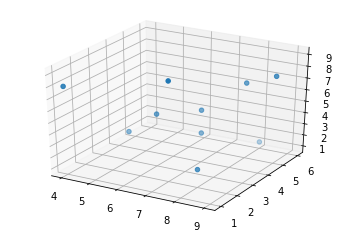

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.37281295, -0.11624764,  1.06904497,  1.01904933,  1.06904497,
         0.33968311,  1.41421356,  0.98058068,  1.33630621,  1.41421356],
       [-0.39223227, -1.16247639, -1.33630621,  0.33968311, -1.33630621,
        -1.35873244, -0.70710678, -1.37281295, -1.06904497, -0.70710678],
       [-0.98058068,  1.27872403,  0.26726124, -1.35873244,  0.26726124,
         1.01904933, -0.70710678,  0.39223227, -0.26726124, -0.70710678]])

In [5]:
# Get Covariance

cov_mat = np.cov(X_scaled)
cov_mat

array([[ 0.25405695,  0.09551739, -0.34957434],
       [ 0.09551739,  0.30891025, -0.40442764],
       [-0.34957434, -0.40442764,  0.75400199]])

In [6]:
# Get Eigenvalues & Eigenvector

eigen_values, eigen_vector = np.linalg.eig(cov_mat)
print('eigen_values:', eigen_values)
print('eigen_vector:', eigen_vector)

print('Lagest Eigen Val:', np.max(eigen_values))
print('Smallest Eigen Val:', np.min(eigen_values))

eigen_values: [1.13338489e+00 1.83584300e-01 4.03670800e-17]
eigen_vector: [[-0.37232564 -0.72666381  0.57735027]
 [-0.4431465   0.68577536  0.57735027]
 [ 0.81547213  0.04088844  0.57735027]]
Lagest Eigen Val: 1.1333848871588146
Smallest Eigen Val: 4.036708004925985e-17


In [7]:
PC1=np.dot(eigen_vector.T[0], X_scaled)
PC1

array([-1.13695332,  1.60119313,  0.41209066, -1.63795602,  0.41209066,
        1.30665112, -0.78982195,  0.56311641, -0.24174163, -0.78982195])

In [8]:
PC2=np.dot(eigen_vector.T[1], X_scaled)
PC2

array([-1.30665112, -0.66043968, -1.68231427, -0.56311641, -1.68231427,
       -1.13695332, -1.54148671, -1.63795602, -1.71509795, -1.54148671])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

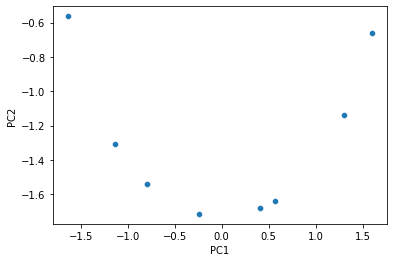

In [9]:
import seaborn as sns 
import pandas as pd

df = pd.DataFrame({ 'PC1': PC1, 'PC2':PC2 })
sns.scatterplot(df["PC1"], df["PC2"]).plot()

# PCA Using Sci-kit Learn

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

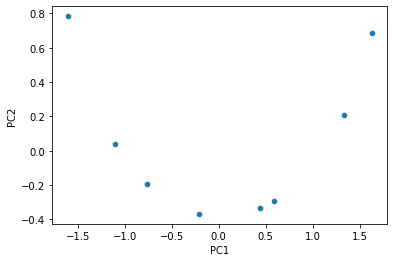

In [10]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_scaled.T)
x_pca = pca.transform(X_scaled.T)


cdf = pd.DataFrame({ 'PC1': x_pca[:,0], 'PC2':x_pca[:,1] })
sns.scatterplot(cdf["PC1"], cdf["PC2"]).plot()